# Projeto Previsão de valores de carros, utilizando Regressões

**Integrantes**
- João Henrique de Oliveira

## Objetivo

O Objetivo do Projeto é criar um modelo de IA para prever valores de carros da planilha ``` CAR DETAILS FROM CAR DEKHO.CSV```, porem eu renomeei para ```car_detail.csv```, para isso será utilizados dois Algoritmos de Regressão o Random Forest Regressor e o Gradient Boosting Regressor

## Manipulação dos Dados e Análise Exploratória

### Imports

Aqui o import das ferramentas/bibliotecas utilizadas sendo elas:
- **Pandas**: Para manipular o nosso dataframe
- **Numpy**: Biblitoeca matématica do Python
- **Matplotlib** e **Seaborn**: para gerar os gráficos
- **Sklearn**: Biblioteca que contém os algoritmos de IA necessários e Métricas para calcular seu aproveitamento

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Transformando nosso arquivo csv para um DataFrame do Pandas

Aqui realizamos apenas a leitura do arquivo passando seu nome e atribuindo a variável df e em seguida exibimos o mesmo

In [ ]:
df = pd.read_csv('car_detail.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Exibindo Informações relevantes

com o comando ```info()``` podemos ver dados sobre os atributos da tabela, percebemos que muitos deles são objects, ou seja são textos/categorias e apenas 2 valores númericos.

Também pode se perceber na celula abaixo com o comando ```isnull().sum()``` que não há nenhum atributo Nulo na nossa tabela, ela está completa, facilitando assim nossa manipulação.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


### Análise e Exploratória

Aqui iremos explorar alguns gráficos para ver a relação dos dados entre si, um bom exemplo de gráfico que achei foi a distribuição de preços dos carros e também a Relação Preço x Ano

Foi utilizada a funçaõ mticker do matplotlib para converter grandes dezenas de números para sua unidade respectiva facilitando a leitura da casa dos milhões

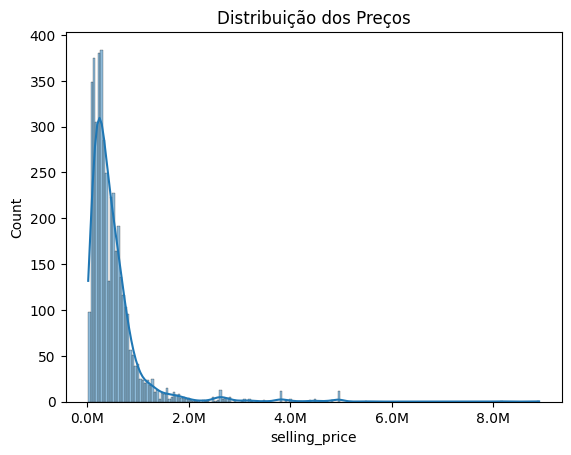

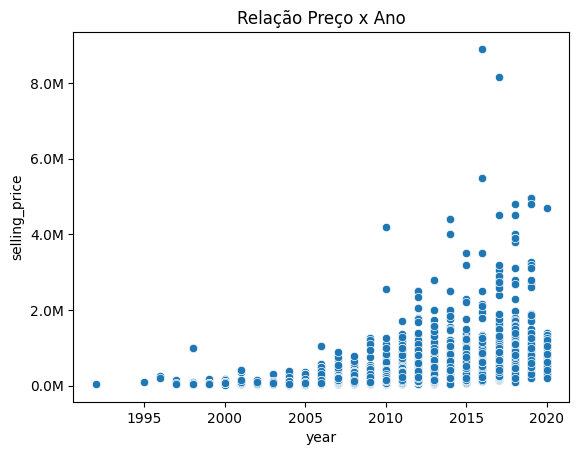

In [ ]:
import matplotlib.ticker as mticker

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Distribuição do preço de venda
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribuição dos Preços')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(millions))
plt.show()

sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relação Preço x Ano')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions))
plt.show()


#### Analisando os gráficos
Pode se perceber que existe um maior volume de carros com valores inferiores a 2 milhões, ou seja, carros mais em conta predominam nossa tabela

Já com o gráfico de Preço x Ano, podemos perceber que quanto mais novo nosso carro, maior a tendência do preço subir

### Transformando os Dados Textuais em Categorias

Aqui utilizei a função astype do pandas para transformar os dados que eram object em categorias e achei importante manter a coluna name, pois ela indica a marca e o modelo do carro, no caso do atributo name, eu peguei apenas a primeira palavra do memso, que ela sempre se remete a marca do carro, que pode influenciar muito no preço do mesmo

In [ ]:
#Convertendo valores não númericos
df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')
df['name'] = df['name'].str.split(' ').str[0].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   category
 1   year           4340 non-null   int64   
 2   selling_price  4340 non-null   int64   
 3   km_driven      4340 non-null   int64   
 4   fuel           4340 non-null   category
 5   seller_type    4340 non-null   category
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   category
dtypes: category(5), int64(3)
memory usage: 125.0 KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


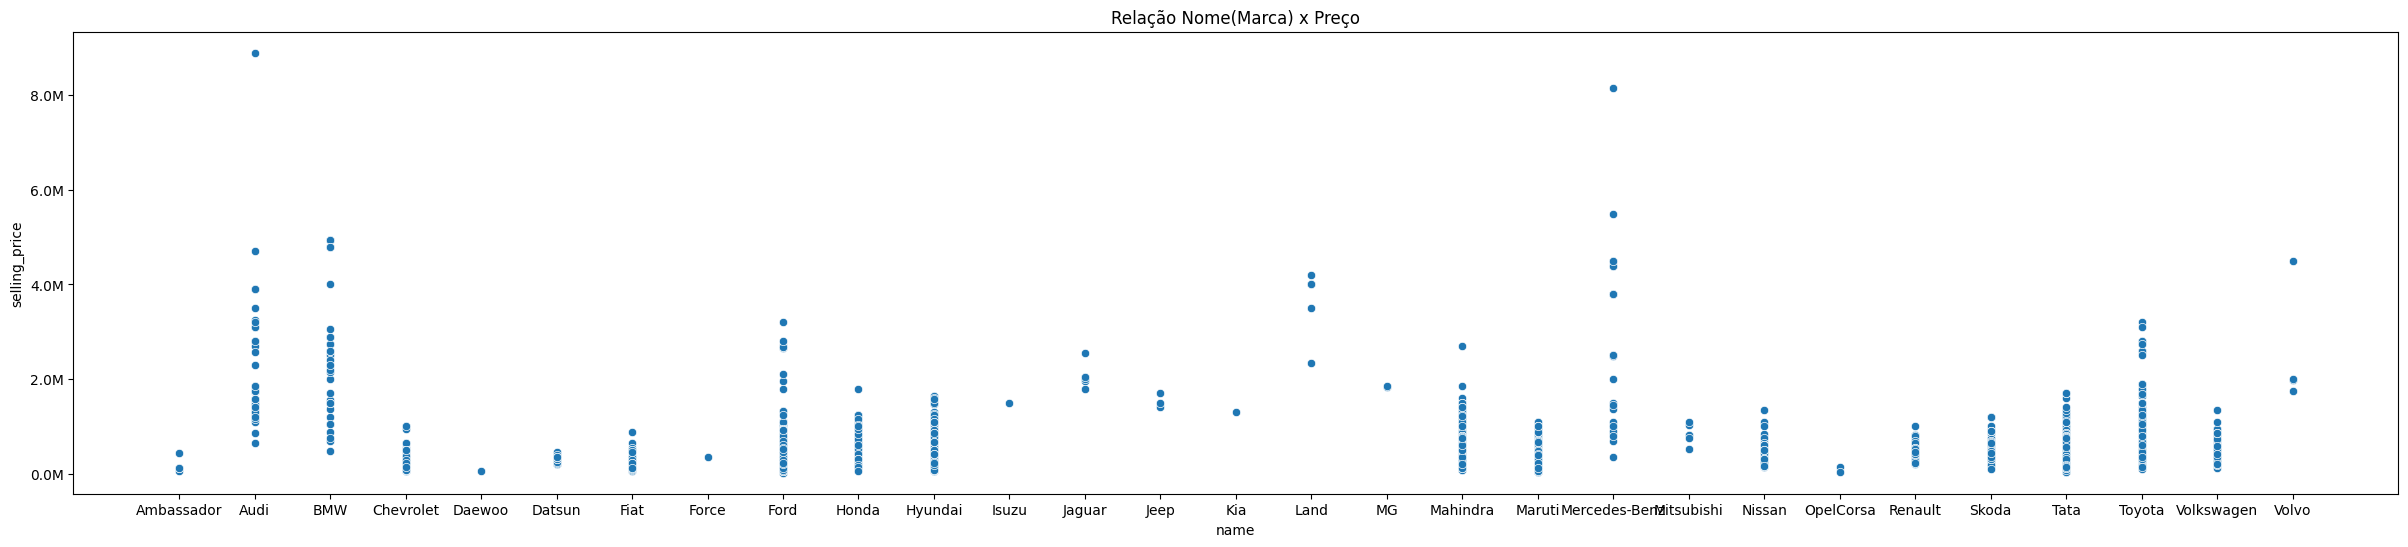

In [ ]:
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df['name'],y=df['selling_price'])
plt.title('Relação Nome(Marca) x Preço')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions))
plt.show()

Aqui eu realizei a transformação dos dados categoricos em int, ou seja cada nome/texto vai representar um número inteiro, diminuindo bastante o processamento e convertendo o dado para número, para que possa ser incluso no treinamento

In [ ]:
for column in ['fuel', 'seller_type', 'transmission', 'owner', 'name']:
    df[column] = pd.Categorical(df[column]).codes

Aqui foi utilizados o Get Dummies para realizar o resto das conversões necessárias

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,18,2007,60000,70000,4,1,1,0
1,18,2007,135000,50000,4,1,1,0
2,10,2012,600000,100000,1,1,1,0
3,5,2017,250000,46000,4,1,1,0
4,9,2014,450000,141000,1,1,1,2


### Matriz de correlação para exibir a relação dos dados entre si

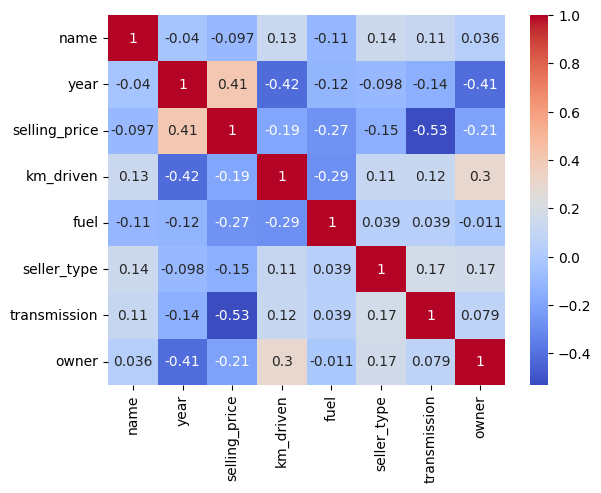

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Treinamento dos Modelos
Aqui a gente irá dividir nossas amostras para teste e treino dos modelos que criarmos, eu defini 75% para treino e 25% para testo, acredito que seja um bom valor e defini a seed como 45

In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


### Algoritmo de GradientBoostingRegressor
Aqui realizamos a chamada do algoritmo necessário, onde passei a taxa de aprendizagem e o número de estimações/interações do mesmo e definindo ainda a seed 45

Abaixo eu mostro os resultados obtidos onde:

1. **RMSE (Root Mean Squared Error):** O Erro Quadrático Médio é a raiz quadrada da média dos erros ao quadrado entre os valores reais e os valores preditos. Ele mede a precisão do modelo, penalizando erros maiores com mais severidade.
2. **MAE (Mean Absolute Error):** O Erro Absoluto Médio é a média dos valores absolutos dos erros entre as previsões e os valores reais. É mais intuitivo, pois não penaliza erros maiores de forma tão intensa quanto o RMSE.
3. **R² (Coeficiente de Determinação):** O R² mede a proporção da variabilidade dos dados que é explicada pelo modelo. Ele varia de 0 a 1, onde 1 significa que o modelo explica perfeitamente os dados, e valores próximos a 0 indicam um modelo com baixa capacidade de explicação.

In [ ]:
# Treinar o modelo de Regressão Linear
gradient_model = GradientBoostingRegressor(learning_rate=0.4, n_estimators=350, random_state=45)
gradient_model.fit(X_train, y_train)

# Fazer previsões
y_pred_gradient = gradient_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gradient)
mean_y_true = np.mean(y_test)
accuracy = 1 - (mae / mean_y_true)

# Avaliar o desempenho do modelo
print("Regressão de GradientBoost:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gradient))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gradient)}")
print(f"R^2: {r2_score(y_test, y_pred_gradient)}")

Regressão de GradientBoost:
RMSE: 243058.60017087284
MAE: 134567.04258670832
R^2: 0.8294243442694249


### Algoritmo de RandomForest
Aqui realizamos a chamada do algoritmo necessário, onde passei a taxa de aprendizagem e o número de estimações/interações do mesmo e definindo ainda a seed 45

Os resultados abaixo, são os mesmos explicados na celula acima

In [ ]:
# Treinar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=350, random_state=45)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mean_y_true = np.mean(y_test)
accuracy = 1 - (mae / mean_y_true)

# Avaliar o desempenho do modelo
print("Random Forest Regressor:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R^2: {r2_score(y_test, y_pred_rf)}")

Random Forest Regressor:
RMSE: 288598.35736245476
MAE: 135565.36756153256
R^2: 0.7595178896310086


### Realizando o Tuning dos paramêtros
aqui usarei o gridSearch para tentar encontrar a melhor combinação de paramêtros possíveis e abaixo e logo após mostrarei os valores obtidos.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros para Random Forest
param_grid = {
    'learning_rate' : [0.3, 0.4, 0.6],
    'n_estimators':  [350, 500],
    'max_depth': [5,7, 10],
    'random_state': [42,45, 33]
}

# Otimizar os hiperparâmetros usando GridSearch
grid_search = GridSearchCV(estimator=gradient_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_gradient_model = grid_search.best_estimator_

print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred_best_gradient = best_gradient_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best_gradient)
mean_y_true = np.mean(y_test)
accuracy = 1 - (mae / mean_y_true)

# Avaliar o modelo otimizado
print("GradientBoosting Otimizado:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_gradient))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_gradient)}")
print(f"R^2: {r2_score(y_test, y_pred_best_gradient)}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores Parâmetros Encontrados:
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 350, 'random_state': 42}
GradientBoosting Otimizado:
RMSE: 234647.56083411715
MAE: 130351.53202392143
R^2: 0.8410256152545392


## Determinando os valores dos carros através do nosso melhor modelo

Aqui estou criando uma copia do DataFrame para um modelo final e logo em seguida fazendo uma previsão e atribuindo os resultados a tabela best_gradient_model

In [ ]:
final_df = df.drop('selling_price', axis=1)
final_prevision = best_gradient_model.predict(final_df).round(2)

Aqui faço a leitura do meu arquivo mais uma vez, para pegar todos os dados da tabela de maneira que permanecem igual estavam, apago a coluna selling_price e adiciono na coluna selling_price nova, os resultados da minha previsão

In [ ]:
table_final = pd.read_csv('car_detail.csv')
table_final.drop('selling_price', axis=1, inplace=True)
table_final = table_final.assign(selling_price=final_prevision)

In [ ]:
table_final.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,105174.52
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,126822.71
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,427093.42
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,295404.61
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,448061.76


Após isso, gero apenas o pdf de resposta

In [ ]:
table_final.to_csv('prevision.csv', index=False)